In [69]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize, LogStretch, SqrtStretch
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import matplotlib.pylab as pylab
from astropy.nddata import Cutout2D
import astropy.units as u
from mpl_toolkits.axes_grid1 import make_axes_locatable


plt.style.use("science")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 15),
         'axes.labelsize': 25,
         'axes.titlesize':25,
         'xtick.labelsize':25,
         'ytick.labelsize':25}
pylab.rcParams.update(params)
%matplotlib inline

In [17]:
path = "../data/j9op02010_drc.fits"
hf = fits.open(path)
hf.info()

Filename: ../data/j9op02010_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     850   ()      
  1  SCI           1 ImageHDU        81   (4221, 4243)   float32   
  2  WHT           1 ImageHDU        44   (4221, 4243)   float32   
  3  CTX           1 ImageHDU        37   (4221, 4243)   int32   
  4  HDRTAB        1 BinTableHDU    633   8R x 312C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 4A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, K, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 4A, L, D, D, D, 3A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 18A, 3A, K, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 1A, D, 3A, 6A, K, D, D, D, D, D, D, D, D, D, D, 23A, D, D, D, D, 3A,

In [65]:
# hf["PRIMARY"].header

In [57]:
hf["PRIMARY"].header["TARGNAME"]

'SDSSJ0029-0055'

In [67]:
hf["PRIMARY"].header["EXPTIME"] # exposure time in seconds

2088.0

In [59]:
hf["SCI"].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4221                                                  
NAXIS2  =                 4243                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1                                                  
BUNIT   = 'ELECTRONS/S'        / Units of science product                       
                                                                                
CD1_1   = 3.36587044829802E-

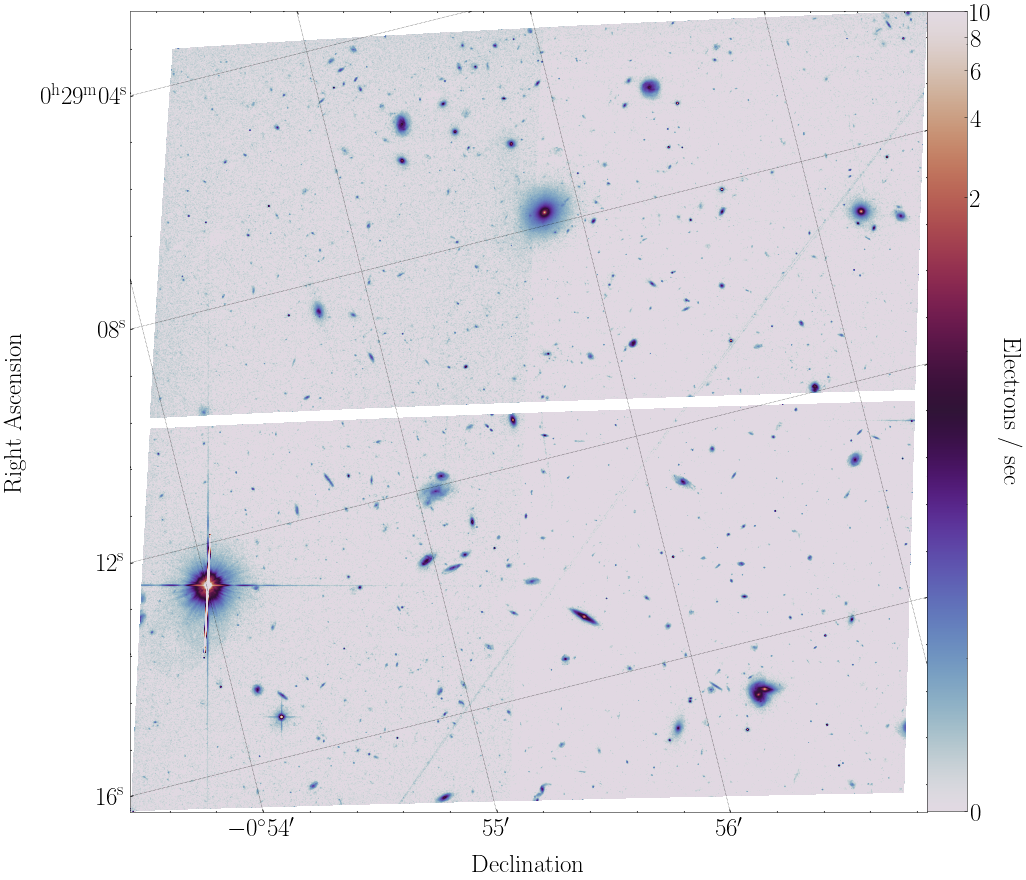

In [116]:
wcs = WCS(hf["SCI"].header)
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(hf["SCI"].data, cmap="twilight", norm=ImageNormalize(stretch=LogStretch(), vmin=0, vmax=10))

# hack to place labels at the correct spot and give coordinates
ax.coords[0].set_ticklabel_position('l')
ax.coords[0].grid(color='black', ls='dotted')
ax.set_ylabel('Right Ascension')
ax.coords[1].set_ticklabel_position('b')
ax.coords[1].grid(color='black', ls='dotted')
ax.set_xlabel('Declination');

cbar = fig.colorbar(im, ax=ax, fraction=0.04777, pad=0)
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel("Electrons / sec", rotation=270);

In [66]:
centroid = SkyCoord(7.2823489, -0.9307202, unit="deg")
centroid = centroid.to_pixel(wcs)
centroid

(array(2191.43905355), array(3175.7261443))

In [78]:
size = 128 * u.pixel
cutout = Cutout2D(hf["SCI"].data, centroid, size, wcs=wcs)
cutout_image = cutout.data
wcs_cutout = cutout.wcs

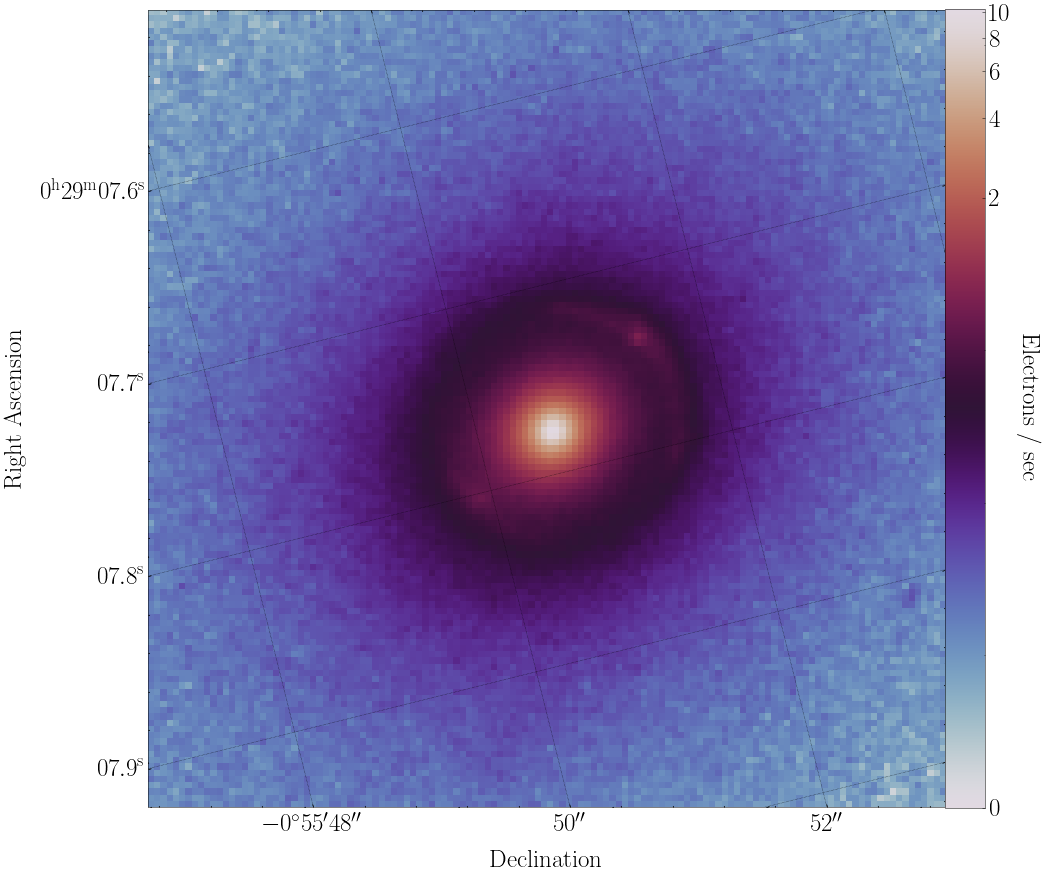

In [114]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(1, 1, 1, projection=wcs_cutout)
im = ax.imshow(cutout_image, cmap="twilight", norm=ImageNormalize(stretch=LogStretch(), vmin=0))

# hack to place labels at the correct spot and give coordinates grid
ax.coords[0].set_ticklabel_position('l')
ax.coords[0].grid(color='black', ls='dotted')
ax.set_ylabel('Right Ascension')
ax.coords[1].set_ticklabel_position('b')
ax.coords[1].grid(color='black', ls='dotted')
ax.set_xlabel('Declination');

cbar = fig.colorbar(im, ax=ax, fraction=0.0477, pad=0)
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel("Electrons / sec", rotation=270);

(-0.5, 127.5, 127.5, -0.5)

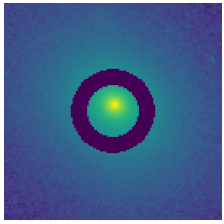

In [134]:
x = np.linspace(-1, 1, 128) * 128
x, y = np.meshgrid(x, x)
r = np.sqrt(x**2 + y**2)
mask = (r > 30) & (r < 50)
plt.imshow(~mask * cutout_image, norm=ImageNormalize(stretch=LogStretch()))
plt.axis("off")